The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [9]:
# Loading in required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Start coding here!

1. Load Dataset

In [10]:
df_file_path = 'data/nobel.csv'
nobel_df = pd.read_csv(df_file_path)

# Drop unuse columns
nobel_df = nobel_df.drop(columns=['motivation', 'prize_share', 'laureate_id', 'birth_city', 'organization_city', 'death_date', 'death_city', 'death_country'])

2. Data Exploration

In [11]:
nobel_df.info()
nobel_df.describe()
print(f"Missing values per column:")
print(nobel_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   laureate_type         1000 non-null   object
 4   full_name             1000 non-null   object
 5   birth_date            968 non-null    object
 6   birth_country         969 non-null    object
 7   sex                   970 non-null    object
 8   organization_name     736 non-null    object
 9   organization_country  735 non-null    object
dtypes: int64(1), object(9)
memory usage: 78.2+ KB
Missing values per column:
year                      0
category                  0
prize                     0
laureate_type             0
full_name                 0
birth_date               32
birth_country            31
sex                 

3. What is the most commonly awarded gender and birth country?

3. 1. Count Plot Visualization – Male vs Female

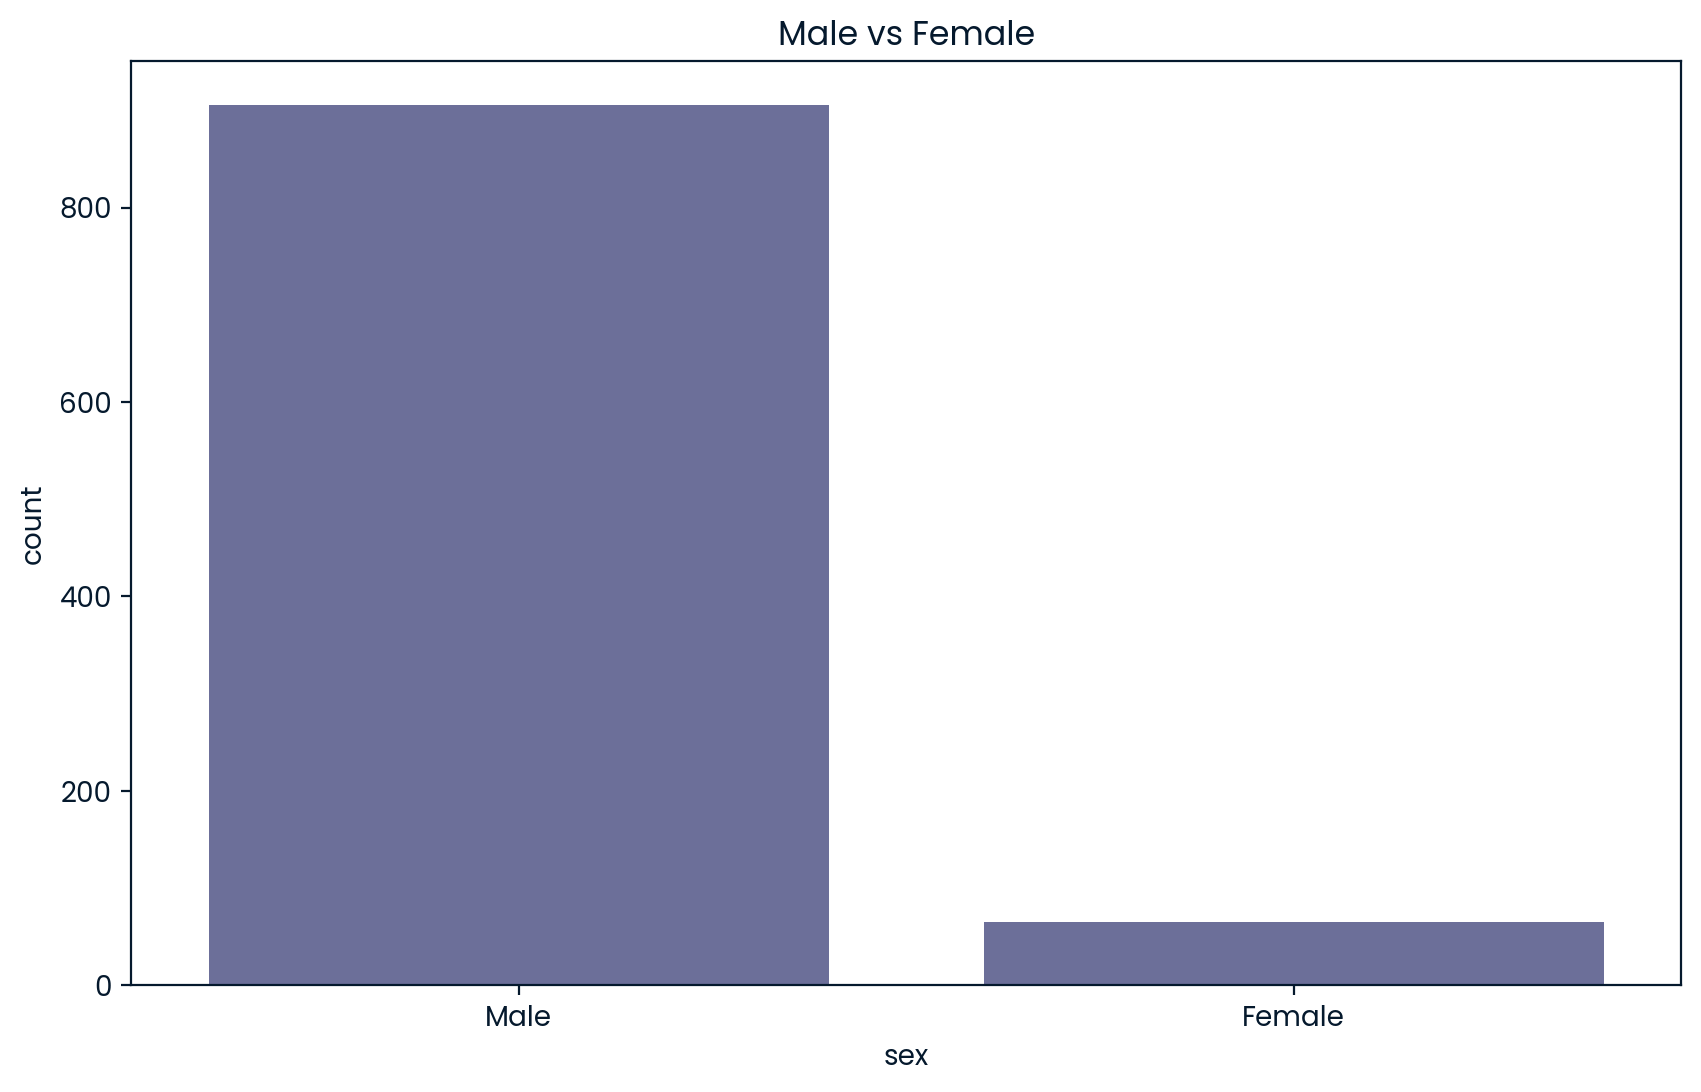

In [12]:
plt.figure(figsize=(10, 6))
g = sns.countplot(x='sex', data=nobel_df)
g.set_title('Male vs Female')
plt.show()

In [13]:
top_gender = nobel_df['sex'].mode()[0]

3. 2. Select top 10 countries

In [14]:
# Group and count

country_count = nobel_df.groupby('birth_country')['prize'].count()

# Convert to DataFrame

country_count_df = country_count.reset_index()
country_count_df.columns = ['birth_country', 'count']

# Sort by count (descending)

country_count_df = country_count_df.sort_values('count', ascending=False)

# Select top 10 countries

top_countries_df = country_count_df.head(10)

3. 3. Bar Plot Visualization – Top 10 Birth Country

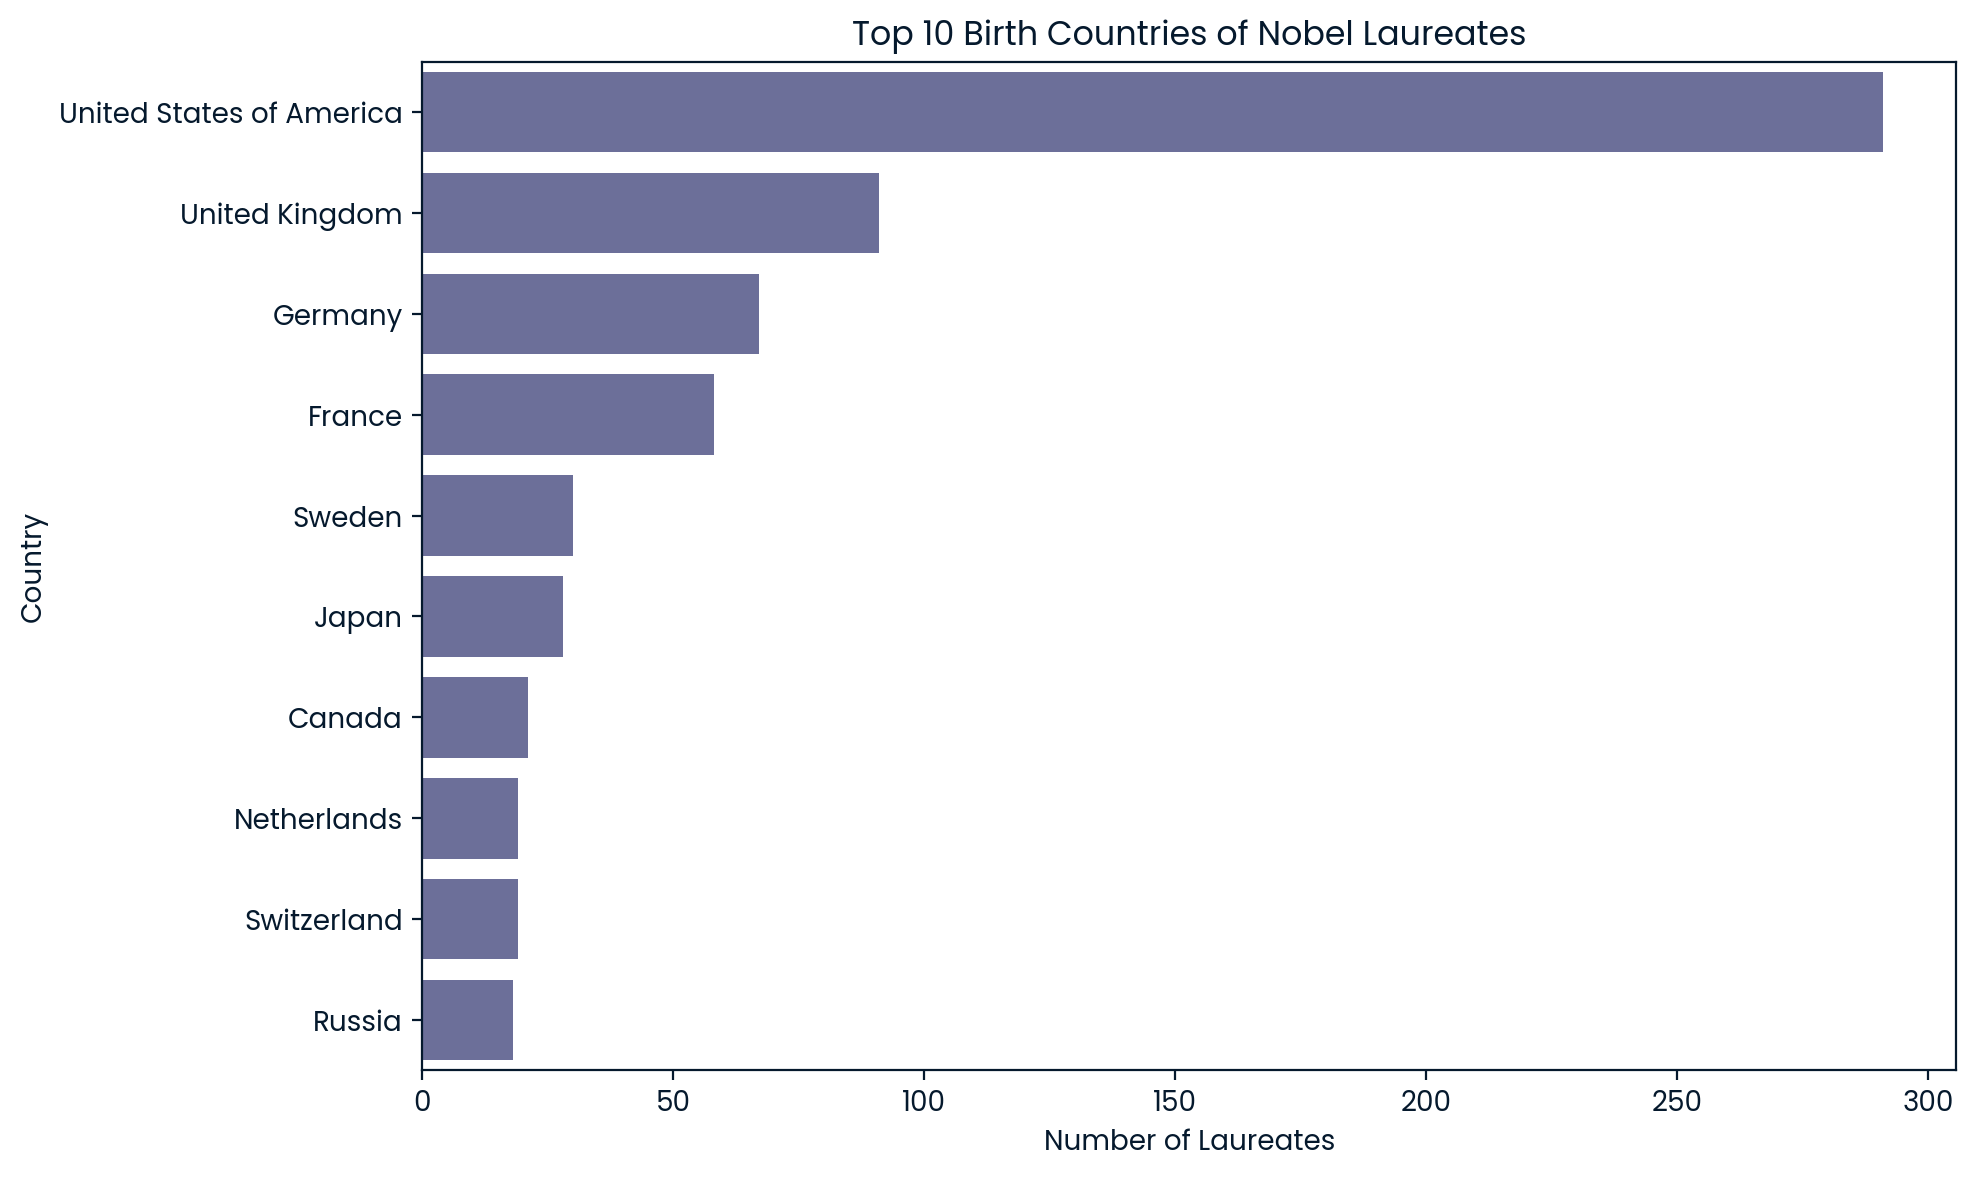

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(y='birth_country', x='count', data=top_countries_df)
plt.title('Top 10 Birth Countries of Nobel Laureates')
plt.xlabel('Number of Laureates')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [16]:
top_country = nobel_df['birth_country'].mode()[0]

4. Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

4. 1. Flag for US-born laureates

In [17]:
nobel_df['is_usa'] = nobel_df['birth_country'] == 'United States of America'

4. 2. Create the decade column

In [18]:
nobel_df['decade'] = (nobel_df['year'] // 10) * 10

4. 3. Group by decade

In [19]:
decade_group = nobel_df.groupby('decade')['is_usa'].agg(['sum', 'count'])

4. 4. Calculate ratio & Find decade with max ratio

In [20]:
decade_group['ratio'] = decade_group['sum'] / decade_group['count']

max_decade_usa = decade_group['ratio'].idxmax()

4. 5. Create a relational line plot

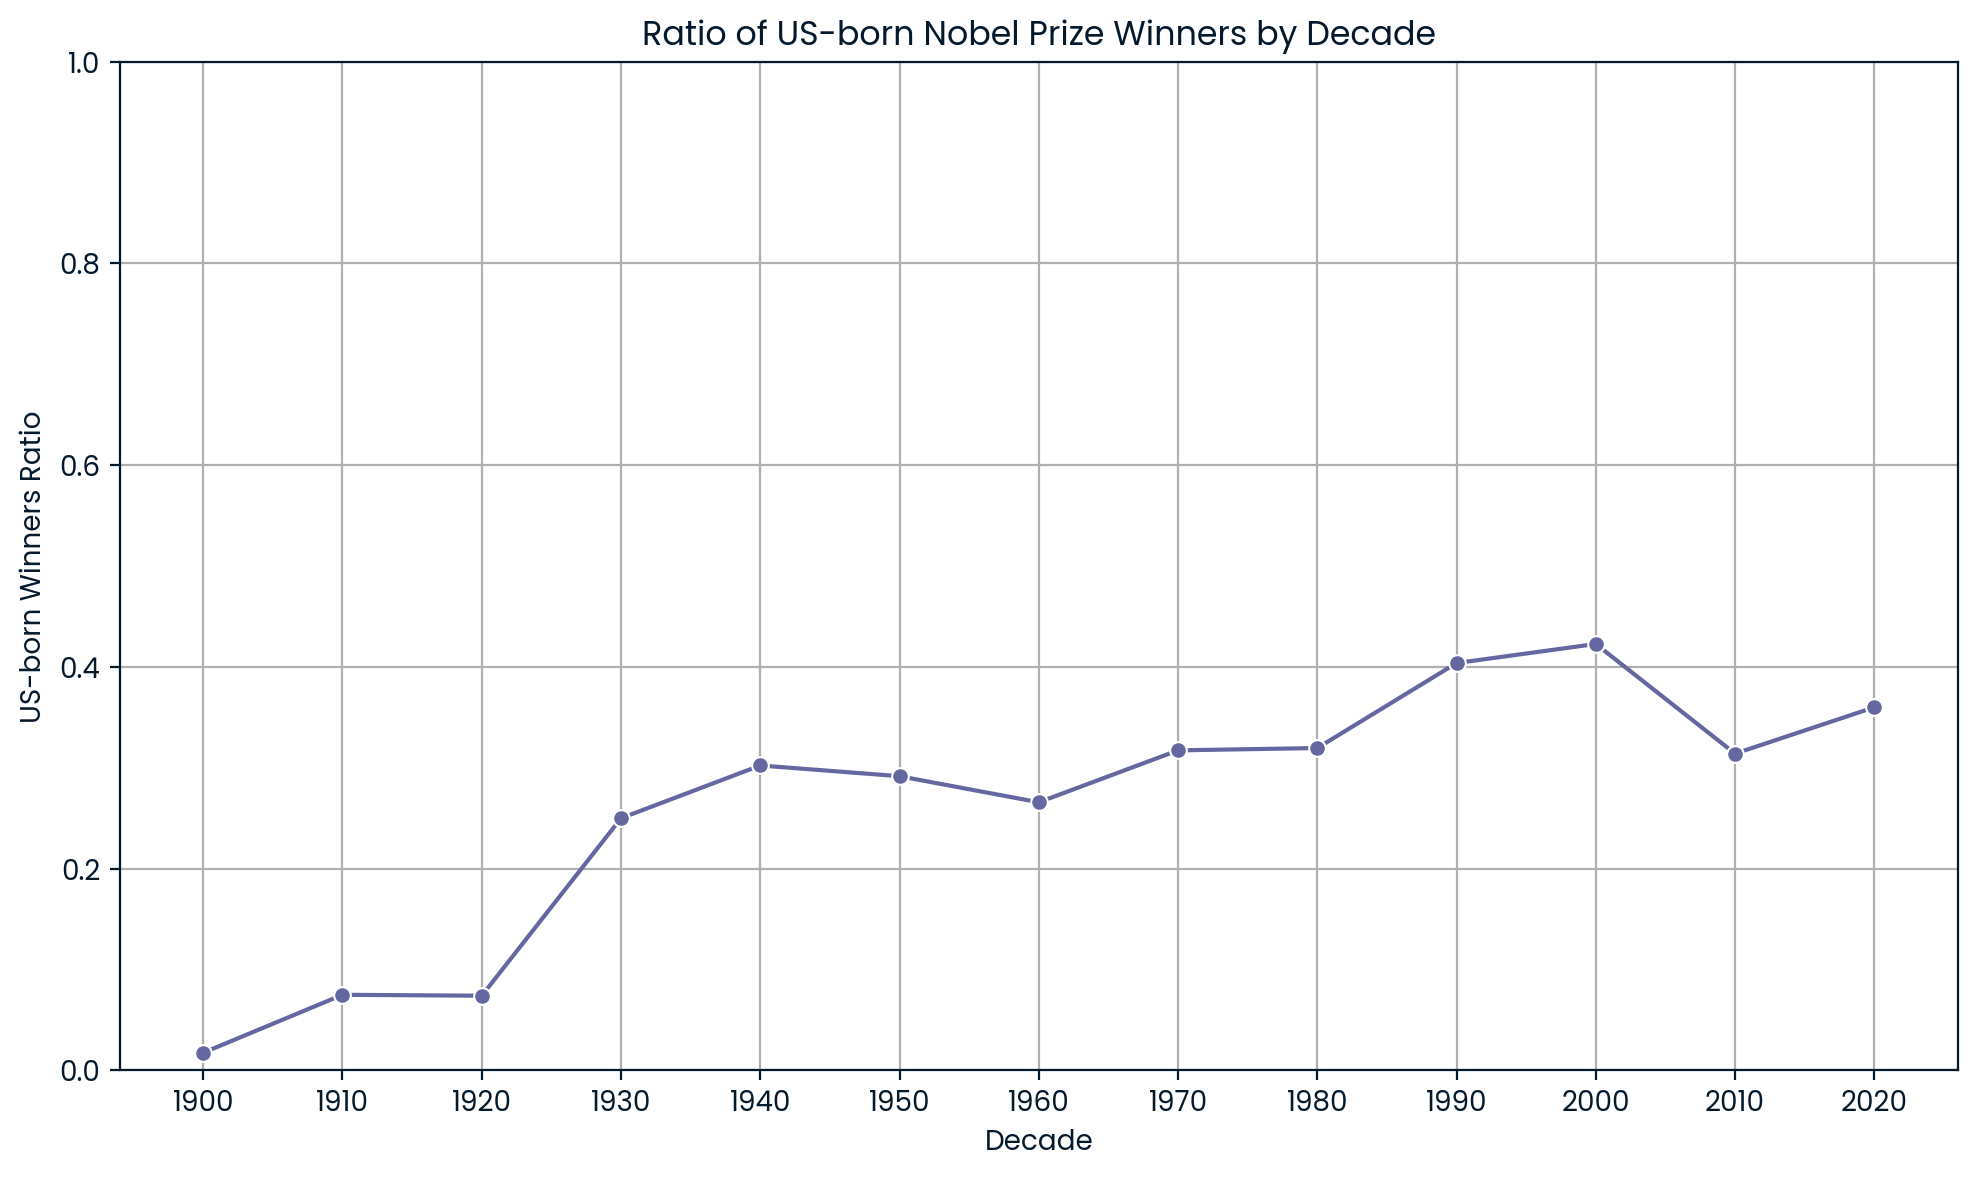

In [21]:
# Reset index for plotting
decade_group_reset = decade_group.reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=decade_group_reset, x='decade', y='ratio', marker='o')

# Plot formatting
plt.title('Ratio of US-born Nobel Prize Winners by Decade')
plt.xlabel('Decade')
plt.ylabel('US-born Winners Ratio')
plt.xticks(decade_group_reset['decade'])
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


5. Find the decade and category with the highest proportion of female laureates

5. 1. Calculating the proportion of female laureates per decade

In [22]:
nobel_df['female_winner'] = nobel_df['sex'] == 'Female'
prop_female_winners = nobel_df.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

5. 2. Find the decade and category with the highest proportion of female laureates

In [23]:
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

5. 3. Create a dictionary with the decade and category pair

In [24]:
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}

5. 4. Plotting female winners with % winners on the y-axis

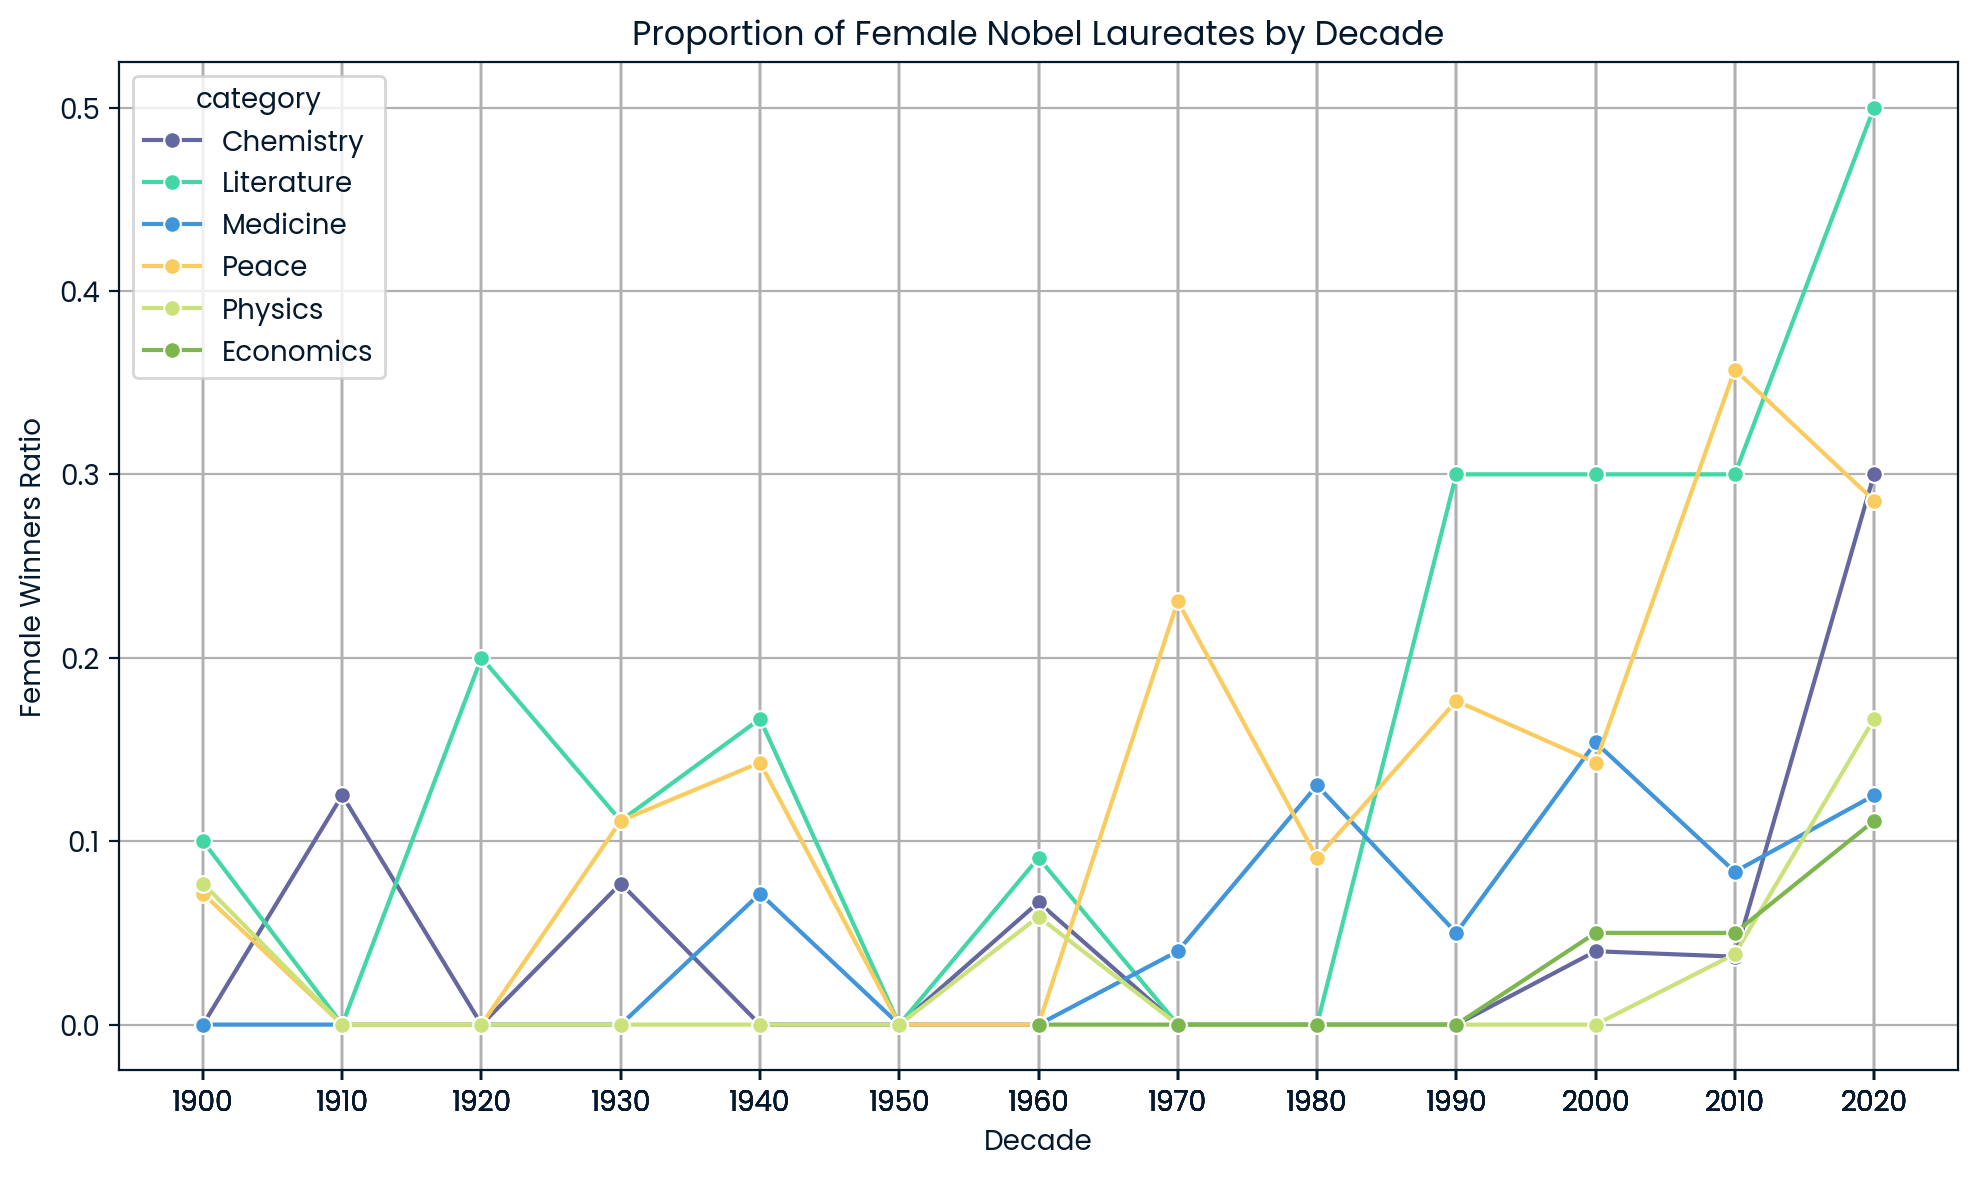

In [28]:
# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=prop_female_winners, x='decade', y='female_winner', hue='category', marker='o')

# Plot formatting
plt.title('Proportion of Female Nobel Laureates by Decade')
plt.xlabel('Decade')
plt.ylabel('Female Winners Ratio')
plt.xticks(prop_female_winners['decade'])
plt.grid(True)
plt.tight_layout()
plt.show()

6. Who was the first woman to receive a Nobel Prize, and in what category?

6. 1. Filter to female laureates

In [375]:
first_woman = nobel_df[nobel_df['sex'] == 'Female'].sort_values('year').iloc[0]

6. 2. Find the minimum value in a column

In [376]:
first_woman_name = first_woman['full_name']
first_woman_category = first_woman['category']

7. Which individuals or organizations have won more than one Nobel Prize throughout the years?

7. 1. Count laureates by name

In [377]:
name_counts = nobel_df['full_name'].value_counts()

7. 2. Filter names with more than one award

In [378]:
repeat_list = name_counts[name_counts > 1].index.tolist()

8. **Final Variable Outputs**

In [7]:
print("Most common gender:", top_gender)
print("Most common birth country:", top_country)
print("Decade with highest US-born ratio:", max_decade_usa)
print("Decade and category with highest proportion of female laureates:", max_female_dict)
print("First woman to win Nobel:", first_woman_name)
print("Category:", first_woman_category)
print("Repeat winners:", repeat_list)

Decade and category with highest proportion of female laureates: {2020: 'Literature'}
